In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df= pd.read_csv("../data/processed/df_final_v1.csv")
df.head()

,ResponseId,MainBranch,Employment,Country,RemoteWork,ConvertedCompYearly,YearsCodePro,YearsCode,DevType,EdLevel,...,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,WebframeHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith,has_salary,log_salary,YearsCodePro_clean,YearsCodePro_num
0,1,I am a developer by profession,"Employed, full-time",United States of America,Remote,NaN,NaN,NaN,NaN,Primary/elementary school,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,17,20,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Express;Next.js;Node.js;React,Amazon Web Services (AWS);Heroku;Netlify,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,False,NaN,17.0,17.0
2,3,I am a developer by profession,"Employed, full-time",United Kingdom of Great Britain and Northern I...,Remote,NaN,27,37,Developer Experience,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",...,NaN,C#,Firebase Realtime Database,ASP.NET CORE,Google Cloud,MSBuild,False,NaN,27.0,27.0
3,4,I am learning to code,"Student, full-time",Canada,NaN,NaN,NaN,4,"Developer, full-stack",Some college/university study without earning ...,...,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,MongoDB;MySQL;PostgreSQL;SQLite,jQuery;Next.js;Node.js;React;WordPress,Amazon Web Services (AWS);Fly.io;Heroku,Docker;npm;Pip,False,NaN,NaN,NaN
4,5,I am a developer by profession,"Student, full-time",Norway,NaN,NaN,NaN,9,"Developer, full-stack","Secondary school (e.g. American high school, G...",...,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,PostgreSQL;SQLite,NaN,NaN,APT;Make;npm,False,NaN,NaN,NaN


In [ ]:
df.describe()

,ResponseId,ConvertedCompYearly,log_salary,YearsCodePro_clean,YearsCodePro_num
count,65437.000000,2.343500e+04,23435.000000,51610.000000,51610.000000
mean,32719.000000,8.615529e+04,10.785883,10.211044,10.211044
std,18890.179119,1.867570e+05,1.402871,9.075136,9.075136
min,1.000000,1.000000e+00,0.693147,0.500000,0.500000
25%,16360.000000,3.271200e+04,10.395528,3.000000,3.000000
50%,32719.000000,6.500000e+04,11.082158,7.000000,7.000000
75%,49078.000000,1.079715e+05,11.589632,15.000000,15.000000
max,65437.000000,1.625660e+07,16.604010,50.000000,50.000000


<Figure size 800x500 with 0 Axes>

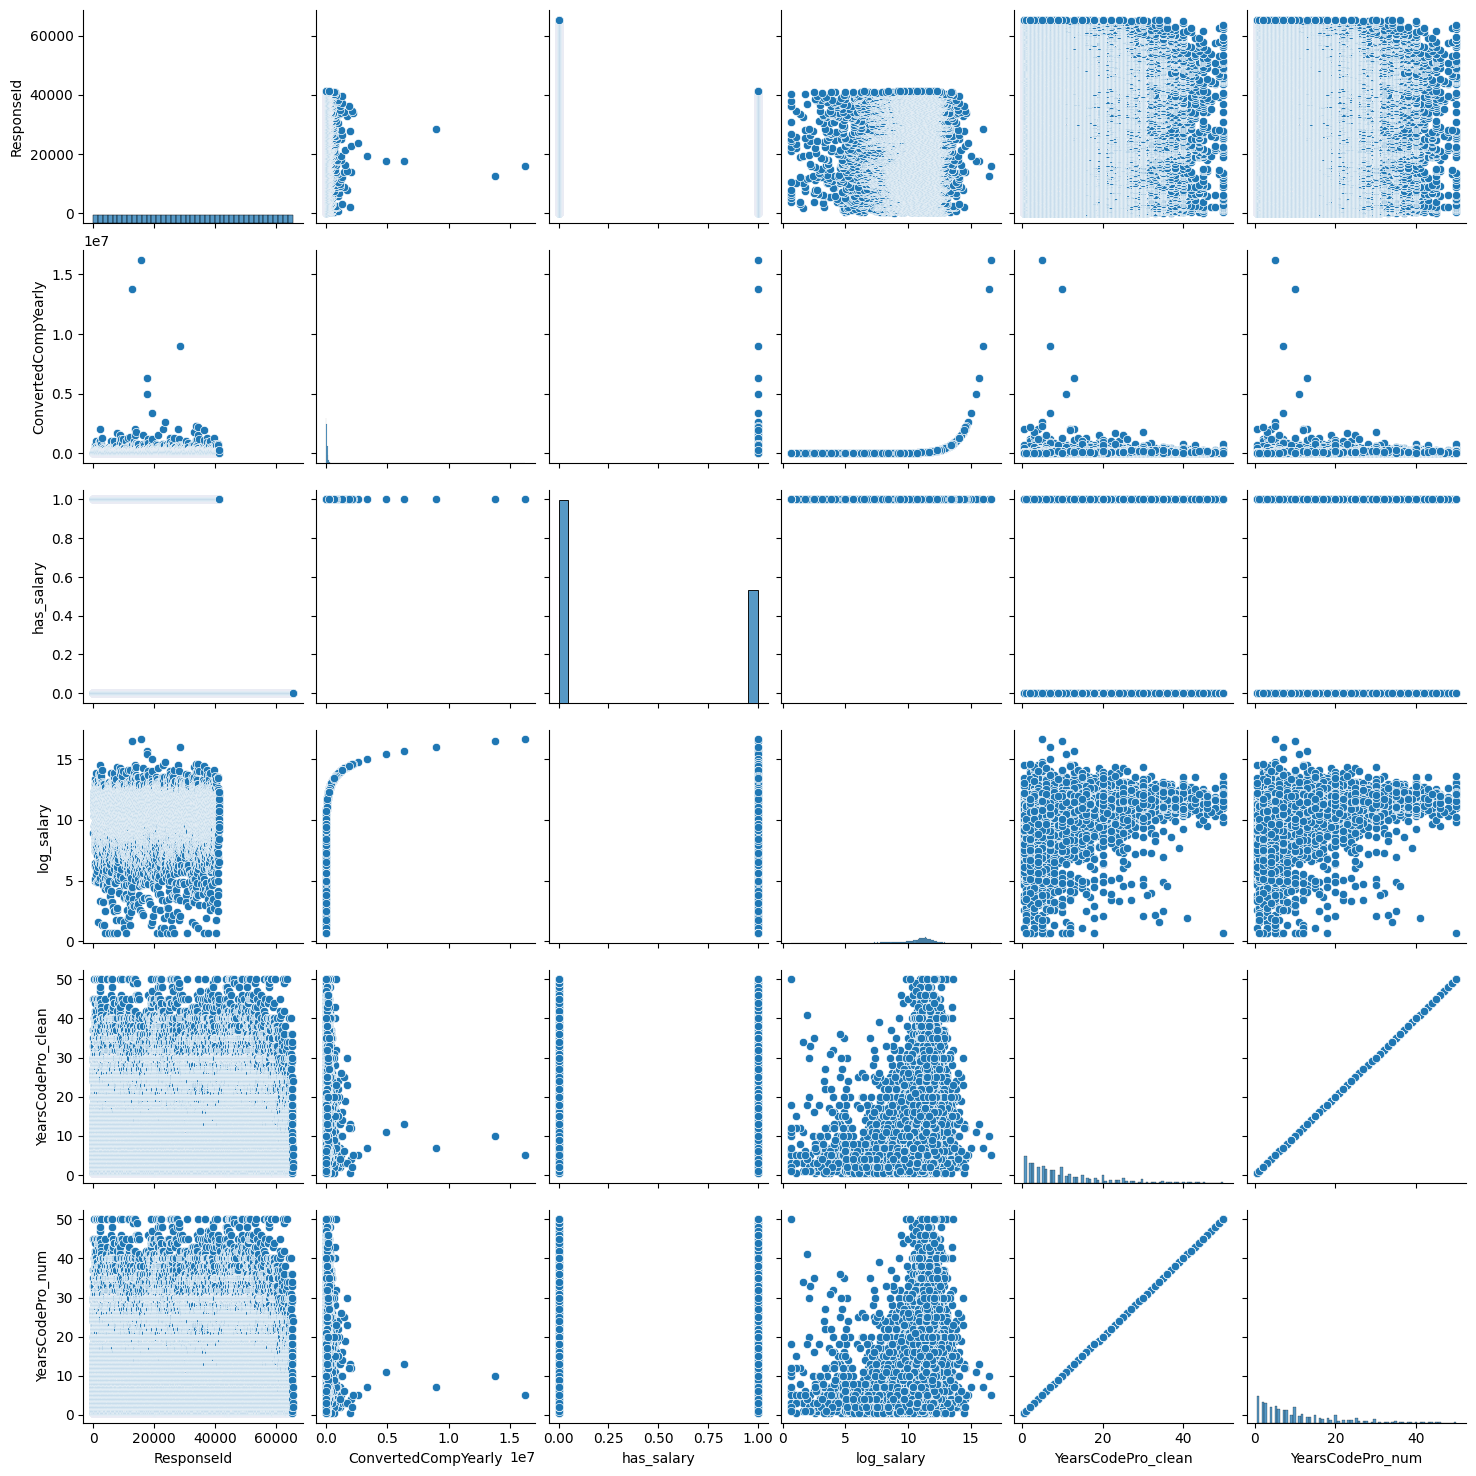

In [4]:
plt.figure(figsize=(8,5))
sns.pairplot(
    data = df
)
plt.show()

<Figure size 800x500 with 0 Axes>

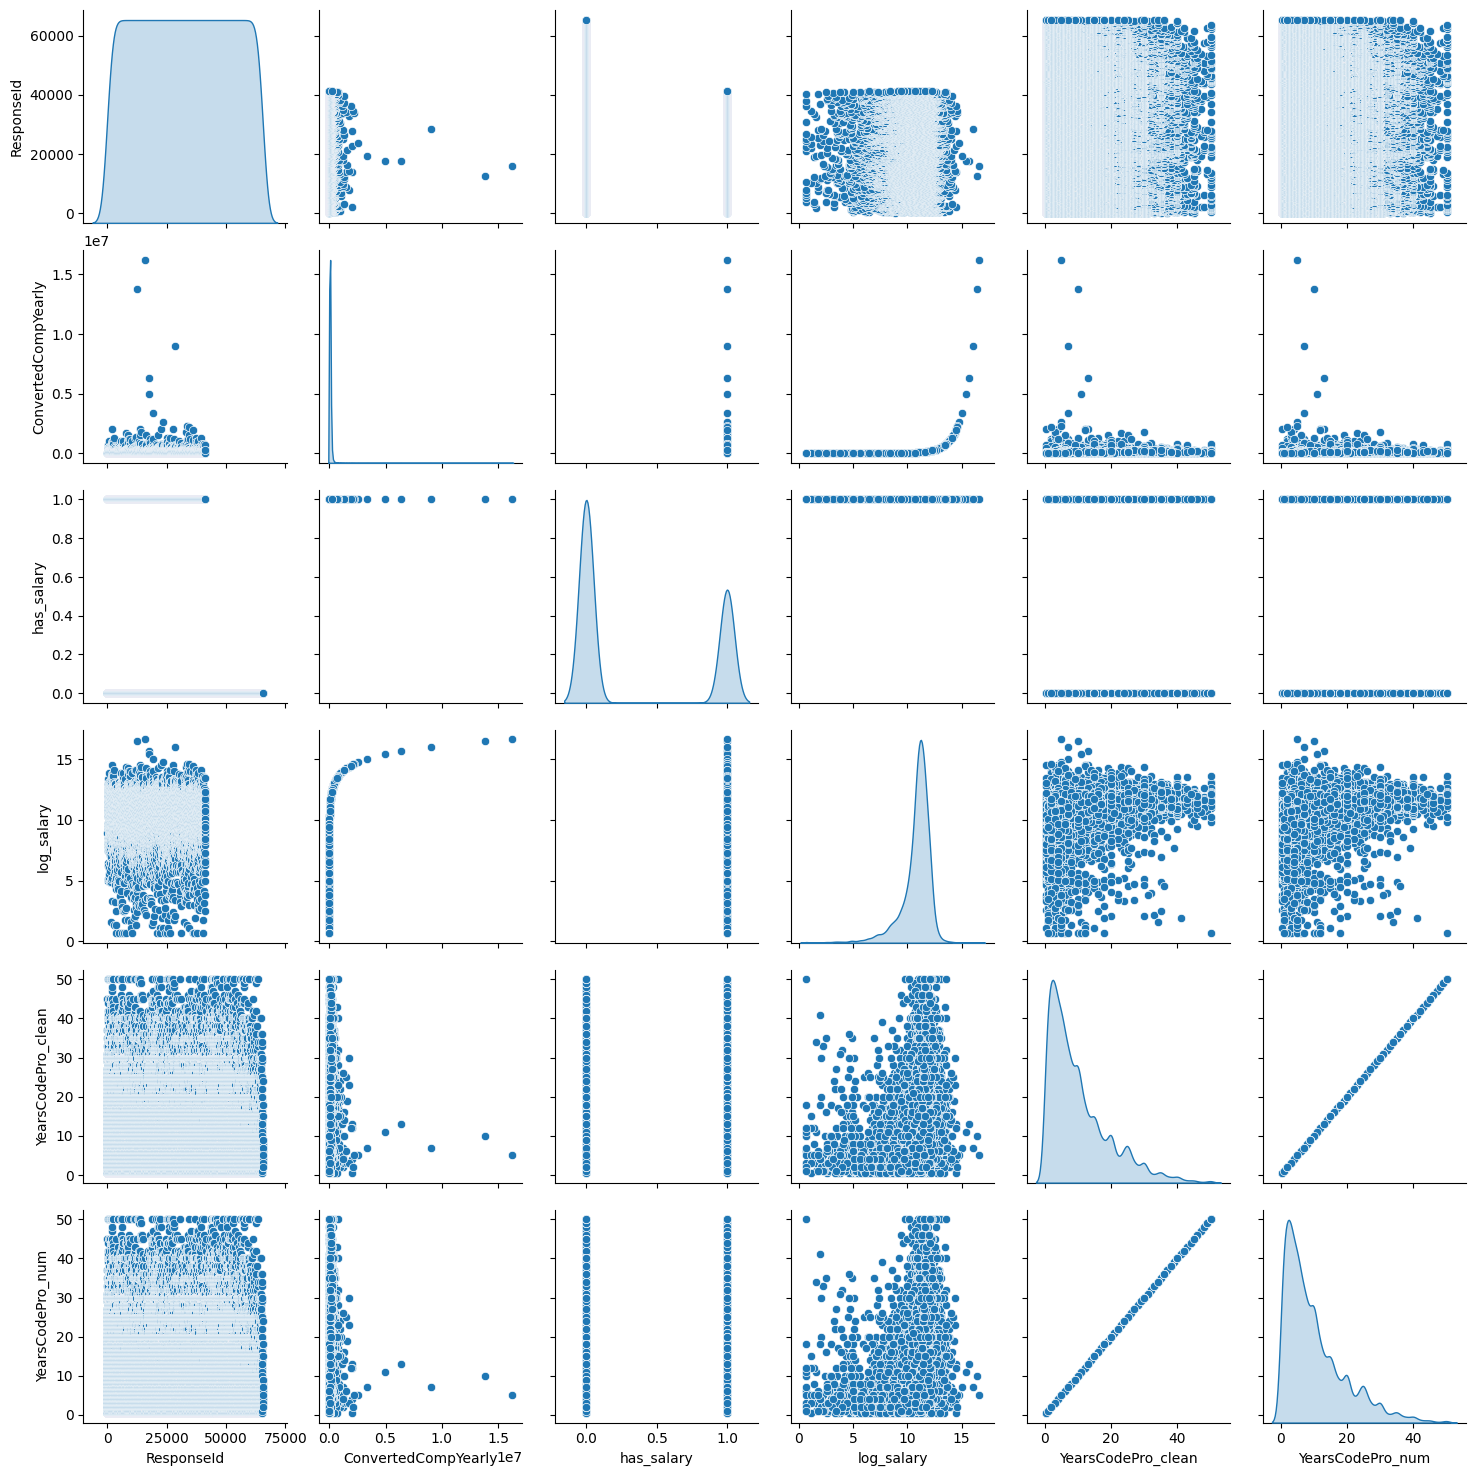

In [5]:
plt.figure(figsize=(8,5))
sns.pairplot(
    diag_kind= 'kde',
    data = df
)
plt.show()

## Conclusiones rapidas

Este bloque resume lo mas relevante del dataset con metricas simples.


In [7]:
# Resumen automatico para conclusiones
row_count, col_count = df.shape
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

lines = []
lines.append(f"Registros: {row_count:,} | Columnas: {col_count}")
lines.append(f"Variables numericas: {len(num_cols)} | categoricas: {len(cat_cols)}")

missing = df.isna().mean().sort_values(ascending=False)
if not missing.empty:
    top_missing = missing.head(5)
    top_missing_str = ", ".join([f"{idx} {val*100:.1f}%" for idx, val in top_missing.items()])
    lines.append(f"Missing (top 5): {top_missing_str}")

if "ConvertedCompYearly" in df.columns:
    s = df["ConvertedCompYearly"].dropna()
    if not s.empty:
        lines.append(
            "Salario anual (ConvertedCompYearly): mediana "
            f"{s.median():,.0f}, p25 {s.quantile(0.25):,.0f}, p75 {s.quantile(0.75):,.0f}"
        )
    else:
        lines.append("Salario anual (ConvertedCompYearly): sin datos suficientes")

if "YearsCodePro_num" in df.columns:
    s = df["YearsCodePro_num"].dropna()
    if not s.empty:
        lines.append(f"Experiencia profesional (YearsCodePro_num): mediana {s.median():.1f} anos")
    else:
        lines.append("Experiencia profesional (YearsCodePro_num): sin datos suficientes")

if "RemoteWork" in df.columns and row_count:
    vc = df["RemoteWork"].fillna("Missing").value_counts()
    if not vc.empty:
        top = vc.index[0]
        share = vc.iloc[0] / row_count
        lines.append(f"RemoteWork: '{top}' es la categoria mas frecuente ({share:.1%})")

if "Country" in df.columns and row_count:
    vc = df["Country"].value_counts()
    if not vc.empty:
        top = vc.index[0]
        share = vc.iloc[0] / row_count
        lines.append(f"Country: '{top}' concentra {share:.1%} de las respuestas")

if "DevType" in df.columns:
    devtype = df["DevType"].dropna().str.split(";").explode().str.strip()
    if not devtype.empty:
        vc = devtype.value_counts()
        top = vc.index[0]
        share = vc.iloc[0] / vc.sum()
        lines.append(f"DevType: rol mas frecuente '{top}' ({share:.1%} de menciones)")

print("Conclusiones rapidas:")
for line in lines:
    print("-", line)


Conclusiones rapidas:
- Registros: 65,437 | Columnas: 21
- Variables numericas: 5 | categoricas: 15
- Missing (top 5): ConvertedCompYearly 64.2%, log_salary 64.2%, PlatformHaveWorkedWith 35.3%, WebframeHaveWorkedWith 31.0%, OrgSize 27.4%
- Salario anual (ConvertedCompYearly): mediana 65,000, p25 32,712, p75 107,972
- Experiencia profesional (YearsCodePro_num): mediana 7.0 anos
- RemoteWork: 'Hybrid (some remote, some in-person)' es la categoria mas frecuente (35.2%)
- Country: 'United States of America' concentra 17.0% de las respuestas
- DevType: rol mas frecuente 'Developer, full-stack' (30.7% de menciones)
